# Методы решения обыкновенных дифференциальных уравнений

# Постановка задач

1. Используя способ последовательного повышения порядка точности, построить метод третьего порядка точности, отличный от методов "3/4" и "аналога формулы Симпсона".

2. Определить порядок метода $$y_{j+1} = y_j + \tau \dfrac{\exp \left(\tau\dfrac{\partial f(t_j,y_j)}{\partial y}\right) - 1}{\tau\dfrac{\partial f(t_j,y_j)}{\partial y}} f\left(t_j + \dfrac\tau2, y_j\right).$$

3. Найти интервал устойчивости метода $$y_{j+1} = y_j + \tau \left(f_j + \dfrac12 \Delta f_{j-1} + \dfrac13 \Delta^2 f_{j-1}\right).$$

4. С заданной точностью $\varepsilon = 10^{-4}$ найти решение задачи Коши с помощью:

    1. явного метода трапеций;

    2. явного метода Рунге-Кутта третьего порядка;

    3. интерполяционного метода Адамса четвертого порядка
$$\begin{cases} 
u_1'(x) = -10 u_1^2(x) + 4u_1(x) + 3u_2^2(x) + 0.875,\\
u_2'(x) = 11 u_2^2(x) + (- 20u_1(x) + 4)\cdot u_2(x) - 7.25,\\
u_1(0) = 0.2,\\
u_2(0) = 0.
\end{cases}$$

# Задача 1

## Теоретические сводки, которые применяются для решения задачи
По способу последовательного повышения порядка точности метод для решения задачи Коши строится на основе приближенного равенства
$$u(x_j+h)\approx u(x_j) +\tau \sum_{i=0}^{q}A_if(t_j + \alpha_i \tau, u(t_j + \alpha_i \tau)),$$
где неизвестные $A_i$ и $\alpha_i$ можно найти из системы уравнений
$$\begin{cases}
		\sum\limits_{i=0}^{q}A_i = 1,\\
	\sum\limits_{i=0}^{q} A_i\alpha_i ^p =\dfrac{1}{p+1},\quad p = 1,2,\ldots, k-1,
	\end{cases}$$
где значение $k$ соответствует порядку уравнения. Также по методу последовательного повышения порядка точности для построения метода третьего порядка нам нужно использовать методы второго и первого порядков. Тогда
- в качестве метода первого порядка используем явный метод Эйлера 
$$\overset{[2]}{y}_{j+1} = \overset{[2]}{y}_{j} + \tau \overset{[2]}{f}_j.$$
- в качестве метода второго порядка используем метод 
$$\begin{cases}
\overset{[3]}{y}_{j+1} = \overset{[3]}{y}_j + \tau \overset{[3]}{f}_{j + \frac12},\\
\overset{[2]}{y}_{j+\frac12} = \overset{[3]}{y}_j +\tau \overset{[3]}{f}_{j}.
\end{cases}$$

## Построение метода
Поскольку нам нужно построить метод третьего порядка, то выбираем $k=3$ и получаем систему уравнений для коэффициентов
$$
\sum_{i=0}^q A_i = 1,\quad \sum_{i=0}^q A_i \alpha_i = \dfrac12,\quad \sum_{i=0}^q A_i\alpha_i^2 = \dfrac13.
$$
Так как $q$ можно выбирать произвольно, то выберем $q=2$. Тогда имеем систему
$$\begin{cases}
A_0 + A_1 = 1,\\
A_0\alpha_0 + A_1\alpha_1 = \dfrac12,\\
A_0 \alpha_0^2 + A_1\alpha_1^2 = \dfrac13.
\end{cases}$$
Мы имеем систему из 3 уравнений с 4 неизвестными. Это позволяет нам произвольно задать одну из неизвестных. К примеру, возьмем $\alpha_0 = \dfrac14$. Тогда система примет вид
$$\begin{cases}
A_0 + A_1 = 1,\\
\dfrac{A_0}{4} + A_1\alpha_1 = \dfrac12,\\
\dfrac{A_0}{16} + A_1\alpha_1^2 = \dfrac13.
\end{cases}$$
Вычтем из второго и третьего уравнений первое и получим
$$\begin{cases}
A_0 + A_1 = 1,\\
4A_1\alpha_1 - A_1= 1,\\
16A_1\alpha_1^2 - A_1 = \dfrac{13}{3};
\end{cases}
\Rightarrow
\begin{cases}
A_0 + A_1 = 1,\\
A_1(4\alpha_1 - 1) = 1,\\
A_1(16\alpha_1^2 - 1) = \dfrac{13}{3}.
\end{cases}$$
Разделим третье уравнение на второе и получим $$4\alpha_1+1 =\dfrac{13}{3}.$$
Тогда $$\alpha_1 = \dfrac56.$$
Из уравнения $$A_1(4\alpha_1 - 1)= 1,$$ подставляя $\alpha_1 = \dfrac56$, получаем $$A_1 = \dfrac37.$$
Подставляя это в первое уравнение исходной системы, имеем $$A_0 = \dfrac47.$$
Итого $$A_0 = \dfrac47, \ A_1 = \dfrac37,\ \alpha_0 = \dfrac14,\ \alpha_1 = \dfrac56.$$
Теперь, подставляя найденные коэффициенты в формулу метода $$y_{j+1} = y_j + \tau \sum_{i=0}^{q}A_if(t_j + \alpha_i \tau, y(t_j + \alpha_i \tau)),$$
получим неявный метод третьего порядка (локально четвертого)
$$\overset{[4]}{y}_{j+1} = \overset{[4]}{y}_j + \dfrac\tau 7 \left(4\overset{[4]}{f}_{j+\frac14} + 3\overset{[4]}{f}_{j+\frac56}\right).$$
Дополним этот метод методами более низкого порядка, чтобы сделать метод явным. Для понижения порядка $(\overset{[4]}{f}_{j+\frac14})$, заменив в нем $\tau = \dfrac14\tau$, добавим указанный ранее метод 2-ого порядка
$$\begin{cases}
\overset{[3]}{y}_{j+\frac14} = \overset{[4]}{y}_j + \dfrac\tau 4 \overset{[2]}{f}_{j + \frac18},\\
\overset{[2]}{y}_{j+\frac18} = \overset{[4]}{y}_j + \dfrac\tau 8 \overset{[4]}{f}_{j}.
\end{cases}$$
(в конце имеем $\overset{[4]}{f}_{j}$, потому что это минимальный порядок локальной погрешности, который мы можем получить в этом методе).
Для понижения порядка $\overset{[4]}{f}_{j+\frac56}$ добавим указанный ранее метод 2-ого порядка, заменив в нем $\tau = \dfrac56\tau$,
$$\begin{cases}
\overset{[3]}{y}_{j+\frac56} = \overset{[4]}{y}_j + \dfrac56\tau \overset{[2]}{f}_{j + \frac13},\\
\overset{[2]}{y}_{j+\frac{5}{12}} = \overset{[4]}{y}_j + \dfrac{5}{12}\tau \overset{[4]}{f}_{j}.
\end{cases}$$
В итоге, собрав все построенные методы в одну систему, получим явный метод третьего порядка
$$
\begin{cases}
\overset{[4]}{y}_{j+1} = \overset{[4]}{y}_j + \dfrac\tau 7 \left(4\overset{[2]}{f}_{j+\frac14} + 3\overset{[2]}{f}_{j+\frac56}\right),\\
\overset{[3]}{y}_{j+\frac14} = \overset{[4]}{y}_j + \dfrac\tau 4 \overset{[2]}{f}_{j + \frac18},\\
\overset{[3]}{y}_{j+\frac56} = \overset{[4]}{y}_j + \dfrac56\tau \overset{[2]}{f}_{j + \frac13},\\
\overset{[2]}{y}_{j+\frac18} = \overset{[4]}{y}_j + \dfrac\tau 8 \overset{[4]}{f}_{j},\\
\overset{[2]}{y}_{j+\frac{5}{12}} = \overset{[4]}{y}_j + \dfrac{5}{12}\tau \overset{[4]}{f}_{j}.
\end{cases}
$$

# Задача 2

У нас имеется метод вида $$y_{j+1} = y_j + \tau \dfrac{\exp \left(\tau\dfrac{\partial f(t_j,y_j)}{\partial y}\right) - 1}{\tau\dfrac{\partial f(t_j,y_j)}{\partial y}} f\left(t_j + \dfrac\tau2, y_j\right).$$

## Теоретические сводки, которые применяются для решения задачи

Большинство численных методов решения задачи Коши $$u'(x) = f(x, u(x)),\quad u\big|_{x=x_0} = u_0$$ можно записать в виде $$y_{j+1} = F(y_{j-q}, y_{j-q+1},\ldots, y_j, y_{j+1},\ldots, y_{j+s}),$$ где $F$ --- некоторая определяемая функция.

**Локальной погрешностью** численного метода будем называть невязку этого метода над точным решением задачи, а именно $$r(x_j, h) = u(x_{j+1}) - F\big(u(x_{j-q}),\ldots, u(x_j), u(x_{j+1}),\ldots,u(x_{j+s})\big).$$

**Погрешностью аппроксимации дифференциальной задачи** в таком случае будем называть величину $$\psi(x_j, h)=\dfrac{r(x_j, h)}{h}.$$

Если величина $\psi(x_j, h)$ представима в виде $$ \psi(x_j, h)= O(h^p),\quad p\geq 1$$ то численный метод называют **методом $p$-ого порядка аппроксимации**.

Собственно порядок аппроксимации, или же глобальная погрешность метода, нас и интересует.

## Определение порядка точности метода

Для того, чтобы определить порядок точности метода, оценим локальную погрешность этого метода. В данном случае локальную погрешность метода можно записать как
$$r(t_j,\tau) = u(t_{j+1}) - u(t_j) - \tau \dfrac{\exp \left(\tau\dfrac{\partial f(t_j,u(t_j))}{\partial u}\right) - 1}{\tau\dfrac{\partial f(t_j,u(t_j))}{\partial u}} f\left(t_j + \dfrac\tau2, u(t_j)\right).$$
Для оценки погрешности разложим функции по степеням $\tau$ (ограничимся второй степенью; при необходимости добавим больше членов разложения):
$$u(t_{j+1}) = u(t_j + \tau) = u(t_j) + \dfrac{\tau}{1!} u'(t_j) + \dfrac{\tau^2}{2!} u''(t_j) + O(\tau^3),$$
$$\exp \left(\tau\dfrac{\partial f(t_j,u(t_j))}{\partial u}\right) = 1+\tau \dfrac{\partial f(t_j,u(t_j))}{\partial u} + \dfrac{\tau^2}{2!} \left(\dfrac{\partial f(t_j,u(t_j))}{\partial u}\right)^2 + O(\tau^3),$$
$$f\left(t_j + \dfrac\tau2, u(t_j)\right) = f(t_j, u(t_j)) + \dfrac{\tau}{2\cdot 1!} \dfrac{\partial f(t_j,u(t_j)}{\partial t} + \dfrac{\tau^2}{2^2\cdot 2!} \dfrac{\partial^2 f(t_j,u(t_j)}{\partial t^2} + O(\tau^3).$$
Теперь все построенные разложения подставим в представление локальной погрешности:
\begin{multline}
r(t_j,\tau) = u(t_j) + \dfrac{\tau}{1!} u'(t_j) + \dfrac{\tau^2}{2!} u''(t_j) - u(t_j)-\\ - \tau \dfrac{1+\tau \dfrac{\partial f(t_j,u(t_j))}{\partial u} + \dfrac{\tau^2}{2!} \left(\dfrac{\partial f(t_j,u(t_j))}{\partial u}\right)^2 - 1}{\tau\dfrac{\partial f(t_j,u(t_j))}{\partial u}} \left(f(t_j, u(t_j)) + \dfrac{\tau}{2\cdot 1!} \dfrac{\partial f(t_j,u(t_j))}{\partial t} + \dfrac{\tau^2}{2^2\cdot 2!} \dfrac{\partial^2 f(t_j,u(t_j))}{\partial t^2}\right) + O(\tau^3)=\\=\dfrac{\tau}{1!} u'(t_j) + \dfrac{\tau^2}{2!}u''(t_j) - \left(\tau + \dfrac{\tau^2}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial u}\right) \left(f(t_j, u(t_j)) + \dfrac{\tau}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial t} + \dfrac{\tau^2}{8} \dfrac{\partial^2 f(t_j,u(t_j))}{\partial t^2}\right) + O(\tau^3)=\\= \dfrac{\tau}{1!} u'(t_j) + \dfrac{\tau^2}{2!}u''(t_j) - \tau f(t_j, u(t_j)) - \dfrac{\tau^2}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial t} - \dfrac{\tau^3}{8} \dfrac{\partial^2 f(t_j,u(t_j))}{\partial t^2} -\\- \dfrac{\tau^2}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial u}f(t_j, u(t_j)) - \dfrac{\tau^3}{4} \dfrac{\partial f(t_j,u(t_j))}{\partial u}\dfrac{\partial f(t_j,u(t_j))}{\partial t} -\dfrac{\tau^4}{16} \dfrac{\partial f(t_j,u(t_j))}{\partial u}\dfrac{\partial^2 f(t_j,u(t_j))}{\partial t^2} + O(\tau^3).
\end{multline}
Все члены со степенями $t^3$ и выше заносим под $O(\tau^3)$, а также используем из постановки задачи Коши тот факт, что $u'(t_j) = f(t_j, u(t_j)).$ Тогда
\begin{multline}
r(t_j, \tau) = \tau u'(t_j) + \dfrac{\tau^2}{2}u''(t_j) - \tau u'(t_j) - \dfrac{\tau^2}{2}u''(t_j) - \dfrac{\tau^2}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial u}u'(t_j) + O(\tau^3) =\\= - \dfrac{\tau^2}{2} \dfrac{\partial f(t_j,u(t_j))}{\partial u}u'(t_j) + O(\tau^3) = O(\tau^2).
\end{multline}

В итоге имеем локальную погрешность метода $r(t_j, \tau) = O(\tau^2)$. Тогда глобальшая погрешность метода $$\psi(t_j, \tau) = \dfrac{O(\tau^2)}{\tau} = O(\tau).$$
А отсюда получаем тот факт, что метод первого порядка точности.

# Задача 3

У нас имеется метод вида $$y_{j+1} = y_j + \tau \left(f_j + \dfrac12 \Delta f_{j-1} + \dfrac13 \Delta^2 f_{j-1}\right).$$
Как можно заметить, в формуле метода использованы конечные разности. Приведем метод к более удобному для исследования устойчивости виду.

## Приведение метода к более удобному виду
Для этого распишем конечные разности
$$\Delta f_{j-1} = f_j - f_{j-1},$$
$$\Delta^2 f_{j-1} = \Delta f_j - \Delta f_{j-1} = f_{j+1} - f_j - (f_{j} - f_{j-1}) = f_{j+1} - 2f_j + f_{j-1}.$$
Подставим эти выражения в формулу метода и получим
$$y_{j+1} = y_j + \tau \left(f_j + \dfrac12 f_j - \dfrac12f_{j-1} + \dfrac13 f_{j+1} - \dfrac23f_j + \dfrac13f_{j-1}\right).$$
После преобразований получим метод вида $$y_{j+1} = y_j + \tau \left(\dfrac13 f_{j+1} + \dfrac56f_j - \dfrac16f_{j-1}\right).$$
Далее введем необходимые для исследования определения. 

## Теоретические сводки, которые применяются для решения задачи

Во-первых, определим модельное уравнение $$u'(x) = \lambda u(x),\quad \lambda \in \mathbb C,\ \operatorname{Re} \lambda < 0,\quad (1)$$ для которого известно, что задача Коши является устойчивой.

Во-вторых, численный метод решения задачи Коши будем называть **устойчивым при некотором значении $z = \lambda \tau$**, если при данном значении устойчиво соответствующее разностное уравнение, получающееся вследствие применения этого метода к решению модельного уравнения.

В-третьих, для того, чтобы **метод был устойчивым**, достаточно того, чтобы все корни соответствующего характеристического уравнения по модулю не превосходили единицы.

В-четвертых, **областью устойчивости** численного метода будем называть множество всех точек $z$ комплексной плоскости, для которых данный метод устойчив, а **интервалом устойчивости** численного метода будем называть пересечение области устойчивости с вещественной осью координат.

Таким образом, мы по сути определили алгоритм исследования метода на устойчивость:

1. применяя исследуемый метод к модельному уравнению, получаем разностное уравнение, которому удовлетворяет приближенное решение;

2. записываем соответствующее характеристическое уравнение;

3. находим корни этого уравнения $q_i$, $i=\overline{0,k}$;

4. решая систему неравенств $|q_i| \leq 1$, $i=\overline{0,k}$, определяем область и интервал устойчивости метода.

Если мы рассмотрим любую точку $z \in \mathbb C$, то эта точка будет принадлежать границе области устойчивости, если при данном значении $z$ выполняется равенство $$\underset{i}{\max}|q_i| = 1 = |q^*|,$$
причем обозначим $q^* = e^{i\varphi},\ \varphi \in [0, 2\pi].$ Решая записанное характеристическое уравнение относительно $z$, мы получаем множество точек, составляющих границу области устойчивости. Поскольку нас интересует не сама область устойчивости, а лишь ее пересечение с вещественной осью координат, то задача упрощается до того, что нам достаточно найти значения в точках $\varphi = \{0, \pi\},$ эти значения и будут составлять интервал устойчивости.

## Исследование устойчивости метода

Применим модельное уравнение (1) к нашему методу в виде $$y_{j+1} = y_j + \tau \left(\dfrac13 f_{j+1} + \dfrac56f_j - \dfrac16f_{j-1}\right).$$. Мы учтем обозначения, принятые в методах решения ОДУ $$u(x_j) = y_j,\quad u'(x_j) = f(x_j, u(x_j)) = f_j.$$
Тогда модельное уравнение (1) может быть переписано в виде $$f_j = \lambda y_j.$$
Используя данное выражение, запишем все $f_k$, $k=j-1, j, j+1$ через $y_k$. Тогда 
$$y_{j+1} = y_j + \tau \left(\dfrac13 \lambda y_{j+1} + \dfrac56\lambda y_j - \dfrac16\lambda y_{j-1}\right).$$
Перенесем все слагаемые в левую сторону
$$y_{j+1} - y_j - \dfrac13\tau  \lambda y_{j+1} - \dfrac56\tau \lambda y_j + \dfrac16\tau \lambda y_{j-1} = 0.$$
Введем замену $z = \tau\lambda$ и вынесем общие множители за скобки
$$\left(1 - \dfrac13z\right)y_{j+1} - \left(1+\dfrac56 z\right)y_j + \dfrac16 z y_{j-1} = 0.$$
Таким образом, мы получили разностное уравнение второго порядка относительно $y_j.$ Запишем для этого уравнения характеристическое уравнение
$$\left(1 - \dfrac13z\right)q^2 - \left(1+\dfrac56 z\right)q + \dfrac16 z = 0.$$
Мы не будем решать данное уравнение относительно $q$. Куда проще будет выразить из него $z$:
$$q^2 - \dfrac13 zq^2 - q - \dfrac56 zq + \dfrac16z = 0,$$
$$z \left(-\dfrac13 q^2 - \dfrac56 q + \dfrac16\right) = -(q^2 - q),$$
$$z = 6\dfrac{q^2 - q}{2q^2 + 5q - 1}.$$
Теперь обозначим $q = e^{i\varphi}$ и тогда получим выражение для кривой $$z = z(\varphi) = 6\dfrac{e^{2i\varphi} - e^{i\varphi}}{2e^{2i\varphi} + 5e^{i\varphi} - 1},\ \varphi \in [0, 2\pi].$$
Имеем $$z(0) = 0, \quad z (\pi) = 6 \dfrac{\cos 2\pi - \cos \pi}{2 \cos 2 \pi + 5 \cos \pi - 1} = 6\cdot \dfrac{2}{-4} = -3.$$
В итоге интервал устойчивости для данного метода равен $$[-3, 0].$$

# Задача 4

Дана задача Коши
$$\begin{cases} 
u_1'(t) = -10 u_1^2(t) + 4u_1(t) + 3u_2^2(t) + 0.875,\\
u_2'(t) = 11 u_2^2(t) + (- 20u_1(t) + 4)\cdot u_2(t) - 7.25,\\
u_1(0) = 0.2,\\
u_2(0) = 0.
\end{cases}$$

Составим компьютерную модель данной задачи Коши.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Дифференциальная модель
def model(u, t):
    u_1, u_2 = u
    du_1dt = -10*u_1**2 + 4*u_1 + 3*u_2**2 + 0.875
    du_2dt = 11*u_2**2 + (-20*u_1 + 4)*u_2 - 7.25
    return np.array([du_1dt, du_2dt])

# Задача Коши
u0_1 = 0.2
u0_2 = 0

По условию сетка узлов не задана, так же как и не заданы границы отрезка интегрирования. Зададим сетку следующим образом:

In [29]:
# Сетка узлов
t_start = 0 # начало отрезка
t_end = 1 # конец отрезка
N = 1000 # число узлов
t = np.linspace(t_start, t_end, N) # переменная для сетки

Хотя с учетом того, что для достижения нужной точности шаг будет выбираться адаптивно, априорно заданная сетка узлов нам, вообще говоря, не нужна. Нас интересуют лишь начало и конец отрезка интегрирования.

Данная задача Коши имеет аналитическое решение
$$
\begin{cases}
u_1(t) = 0.2 - 4.2\tanh(-7 t) + 3.75 \tanh (-7.5 t),\\
u_2(t) = -7\tanh(-7t) + 7.5\tanh(-7.5t).
\end{cases}
$$
Зададим компьютерно функцию, которая будет вычислять значение этого решения в заданных точках.

In [30]:
def real_solution(nodes):
    t = np.array(nodes)
    y1 = 0.2 - 4.2*np.tanh(-7.*t) + 3.75 * np.tanh(-7.5*t)
    y2 = -7. * np.tanh(-7.*t) + 7.5*np.tanh(-7.5*t)
    return np.array([y1, y2]).T

Построим график этого решения на размеченной ранее сетке узлов.

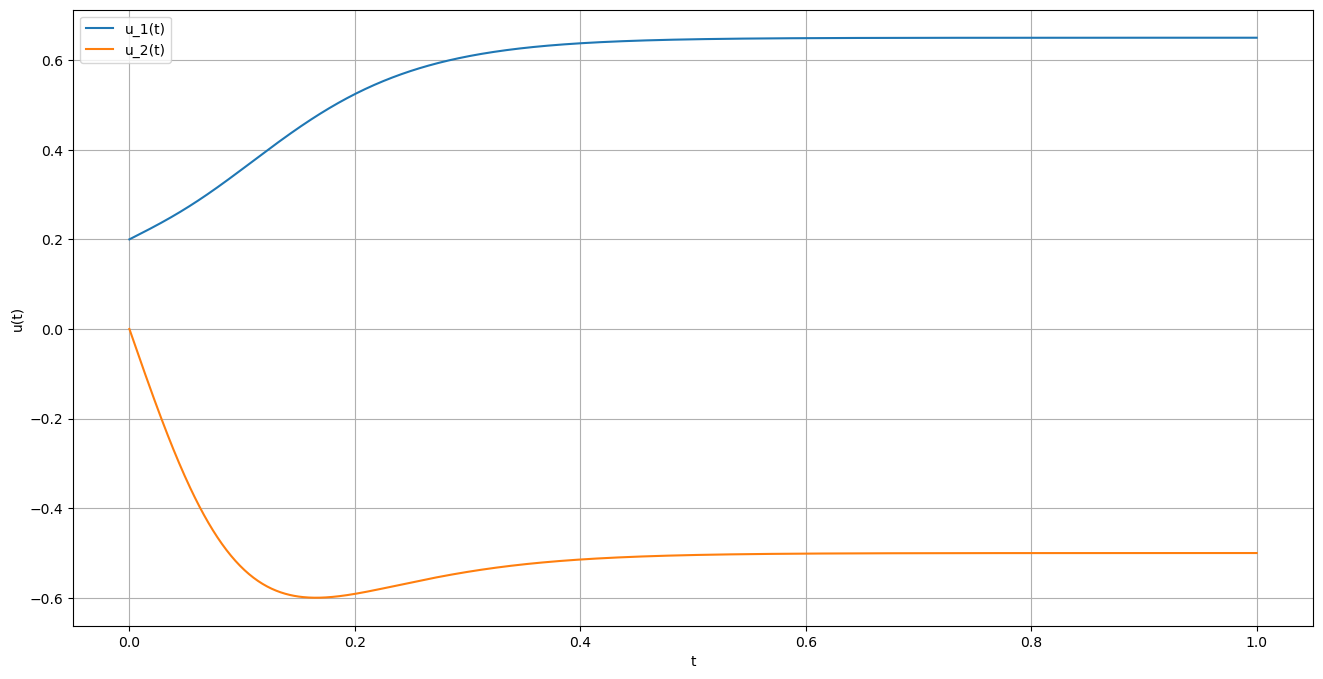

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(t, real_solution(t)[:, 0], label='u_1(t)')
plt.plot(t, real_solution(t)[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

## Описание алгоритма

Явный метод трапеций и метод Рунге-Кутты будут реализованы по следующему алгоритму. Сперва мы берем начальное значение $t = t_0 = 0$ и задаем шаг $$h_1 = h = \sqrt[m]\varepsilon,$$
где $m$ --- порядок точности метода. С этим шагом мы применяем формулу метода для отыскания $y^h_{j+1}$. После этого мы берем новый шаг $$h_2 = \dfrac{h}{2}.$$
С этим шагом мы снова применяем формулу метода и получаем $y^{\frac h2}_{j+1}$. После этого мы проверяем выполнение условия $$\dfrac{y^{h_2}_{j+1} - y^{h_1}_{j+1}}{1 - \left(\frac{h_2}{h_1}\right)^m}\leq \varepsilon.$$
Если условие не выполнено, то берем новый шаг $h_3 = \dfrac{h_2}{2}$, вычисляем $y^{\frac h4}_{j+1}$, а затем снова проверяем условие. И так далее.

Если условие выполнено, то записываем текущее значение $y_{j+1} = y^{h_2}_{j+1}$, текущий узел $t_{j+1} = t_j + h_2$. Проверяем, не оказалось ли $t_{j+1}$ больше, чем правый край отрезка интегрирования. Если нет, то считаем следующее $y_{j+1}$, начиная с шага $h_{new} = 1.05 h_{last}$ (1.005 для ускорения работы алгоритма). Если оказалось больше, то дописываем последнее $t_{j+1} = b - t_j$ и возвращаем сетку узлов и приближенные значения функций.

## Явный метод трапеций
Формула явного метода трапеций записывается в следующем виде
$$\begin{cases}
{y}_{j+1} = {y}_j + h{f}_j,\\
{y}_{j+1} = {y}_j + \dfrac{h}{2}\left({f}_j + {f}_{j+1}\right). 
\end{cases}$$
Реализуем по описанному выше алгоритму данный метод:

In [35]:
def adaptive_trapezoids_integrate(f, y0, t, epsilon):
    y = [np.array(y0)] # Массив значений y
    t_current = t[0]  # Текущее значение t
    t_new = [t[0]] # Массив для новой сетки узлов
    j = 0 # Переменная для индексации
    h_current = epsilon**(1/2) # Текущее значение шага
    k = 1.05
    while True:
         
        while True:
            # Вычисление y_j+1 с шагом h по формуле метода
            y_high = y[j] + h_current * f(y[j], t_current)
            y_high = y[j] + h_current/2 * (f(y[j], t_current) + f(y_high, t_current+h_current))
            
            h_half = 0.5 * h_current # деление шага пополам
            
            # Вычисление y_j+1 с шагом h/2 по формуле метода
            y_low = y[j] + h_half * f(y[j], t_current)
            y_low = y[j] + h_half/2 * (f(y[j], t_current) + f(y_low, t_current+h_current))
            
            # Значение погрешности на шаге h
            error = np.max(y_low - y_high) / (1 - (h_half / h_current)**2)
            
            if error < epsilon: # Если значение погрешности ниже заданного, то...
                y.append(y_high) # ... добавляем в массив y текущее значение y_j+1
                break # выходим из бесконечного цикла
            else: # Иначе..
                h_current *= 0.5 # делим шаг пополам и повторяем процедуру
                
        j += 1 # Повышаем значение для индекса
        if t_current + h_current > t[-1]: # Если t + h > правый край отрезка интегрирования..
            t_new.append(t[-1]) # ... добавляем в новую сетку правый край отрезка интегрирования (не учитывая шаг)
            break # выходим из бесконечного цикла
        else: # Иначе..
            t_current += h_current # ... прибавляем t+h
            t_new.append(t_current) # добавляем значение t+h в массив для новой сетки узлов
            h_current *= k
    
    return np.stack(y, axis=0), t_new # Возвращаем вектор приближенных решений и новую сетку узлов

Вычислим по построенному методу решение задачи Коши

In [36]:
u0 = [u0_1, u0_2]
solution, nodes = adaptive_trapezoids_integrate(model, u0, t, 1e-4)

Посмотрим, сколько узлов содержит новая сетка

In [37]:
len(nodes)

5615

Вычислим максимальное отклонение аналитического решения от приближенного решения.

In [38]:
np.max(np.absolute(solution - real_solution(nodes)))

5.19633365096972e-05

Построим график полученного решения

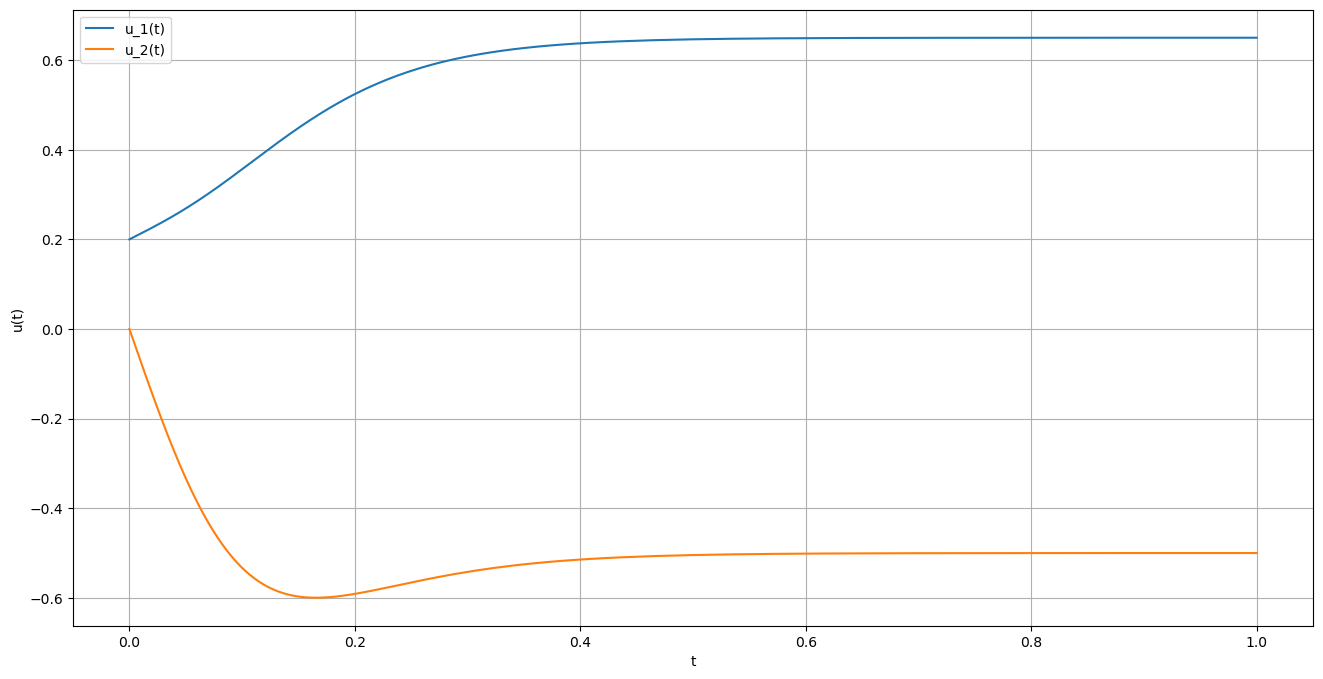

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(nodes, solution[:, 0], label='u_1(t)')
plt.plot(nodes, solution[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

## Метод Рунге-Кутта 3-его порядка
Формула метода записывается в виде
$$\begin{cases}
y_{j+1} = y_j + \dfrac14 (\varphi_0 + 3\varphi_2),\\
\varphi_0 = hf(x_j, y_j),\\
\varphi_1 = hf\left(x_j + \dfrac13h, y_j + \dfrac13 \varphi_0\right),\\
\varphi_2 = hf\left(x_j + \dfrac23h, y_j + \dfrac23\varphi_1\right).
\end{cases}$$
Реализуем по описанному выше алгоритму данный метод:

In [40]:
def adaptive_third_order_runge_kutta(f, y0, t, epsilon):
    y = [np.array(y0)]
    t_current = t[0]
    t_new = [t[0]]
    j = 0
    h_current = epsilon**(1/2)
    k = 1.05
    while True:
        
        while True:
            phi_0 = h_current * f(y[j], t_current)
            phi_1 = h_current * f(y[j] + 1/3 * phi_0, t_current + 1/3 * h_current)
            phi_2 = h_current * f(y[j] + 2/3 * phi_1, t_current + 2/3 * h_current)
            y_high = y[j] + 1/4 * (phi_0 + 3*phi_2)
            
            h_half = 0.5 * h_current
            phi_0_low = h_half * f(y[j], t_current)
            phi_1_low = h_half * f(y[j] + 1/3 * phi_0_low, t_current + 1/3 * h_half)
            phi_2_low = h_half * f(y[j] + 2/3 * phi_1_low, t_current + 2/3 * h_half)
            y_low = y[j] + 1/4 * (phi_0_low + 3*phi_2_low)
            
            error = np.max(y_low - y_high) / (1 - (h_half / h_current)**3)
            
            if error <= epsilon:
                y.append(y_high)
                break
            else:
                h_current *= 0.5
                
        j += 1
        if t_current + h_current > t[-1]:
            t_new.append(t[-1])
            break
        else:
            t_current += h_current
            t_new.append(t_current)
            h_current *= k
    
    return np.stack(y, axis=0), t_new

Вычислим по построенному методу решение задачи Коши

In [11]:
u0 = [u0_1, u0_2]
solution, nodes = adaptive_third_order_runge_kutta(model, u0, t, 1e-4)

Посмотрим, сколько узлов содержит новая сетка

In [12]:
len(nodes)

4833

Вычислим максимальное отклонение аналитического решения от приближенного решения.

In [13]:
np.max(np.absolute(solution - real_solution(nodes)))

1.7562879911503515e-06

Построим график полученного решения

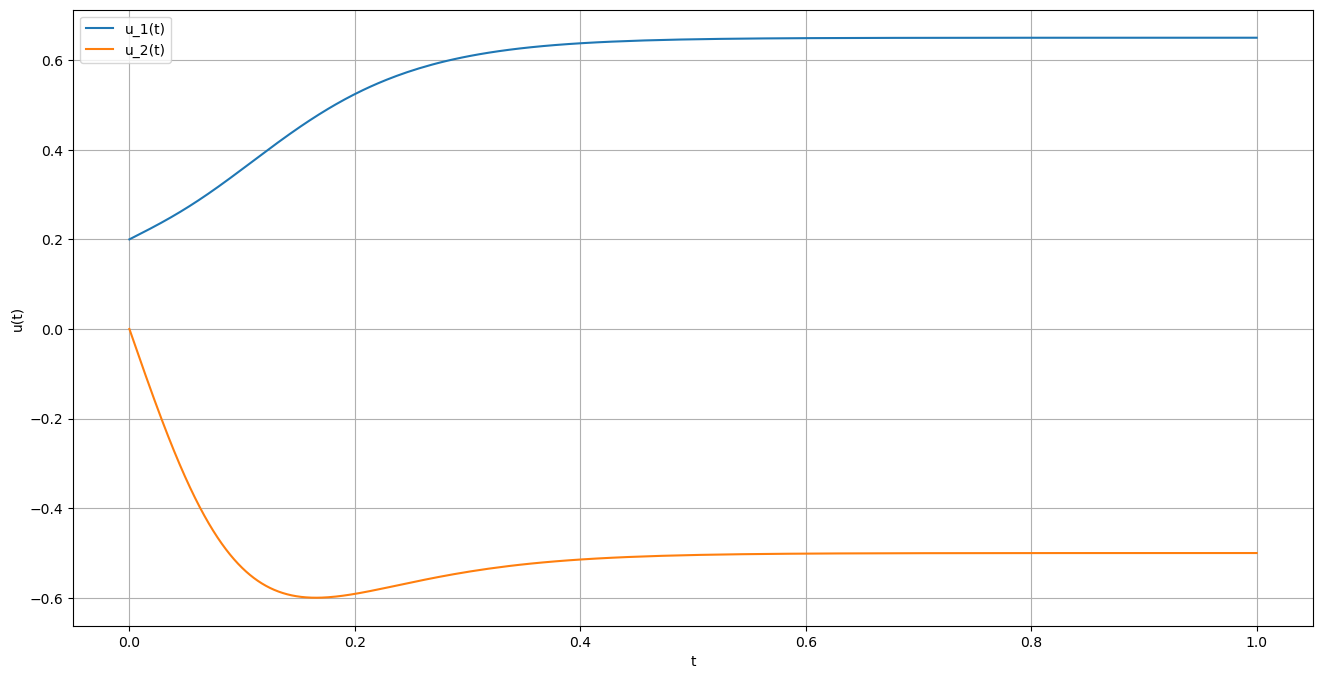

In [14]:
plt.figure(figsize=(16, 8))
plt.plot(nodes, solution[:, 0], label='u_1(t)')
plt.plot(nodes, solution[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

## Интерполяционный метод Адамса 4-ого порядка

Формула метода записывается в виде $$y_{j+1} = y_j + \dfrac{\tau}{24}\left(9 f_{j+1} + 19 f_j - 5f_{j-1} + f_{j-2}\right); \ y_0, y_1, y_2.$$
Реализация данного метода требует от нас дополнительных усилий. Так как метод требует точки $y_0, y_1, y_2$, то сперва методом 4-ого порядка мы должны построить эти точки. К примеру, возьмем метод Рунге-Кутты 4-ого порядка $$\begin{cases}
			y_{j+1} = y_j + \dfrac16 (\varphi_0 + 2\varphi_1 + 2\varphi_2 + \varphi_3),\\
			\varphi_0 = hf_j,\\
			\varphi_1 = hf\left(x_j + \dfrac12h, y_j + \dfrac12\varphi_0\right),\\
			\varphi_2 = hf\left(x_j + \dfrac 12h, y_j + \dfrac12 \varphi_1\right),\\
			\varphi_3 = hf(x_j + h, y_j + \varphi_2).
		\end{cases}$$ 

А из-за того, что метод неявный, мы будем вычислять с помощью МПИ $$y^{k+1}_{j+1} = y_j + \dfrac{\tau}{24}\left(9 f(t_{j+1}, y_{j+1}^k) + 19 f_j - 5f_{j-1} + f_{j-2}\right)\quad \texttt{while}\quad |y_{j+1}^{k+1} - y_{j+1}^k| > \varepsilon.$$
Реализуем по описанному выше алгоритму данный метод.

Начнем с реализации метода Рунге-Кутты для вычисления $y_1, y_2$:

In [50]:
def adaptive_fourth_order_runge_kutta(f, y0, t, epsilon):
    y = [np.array(y0)]
    t_current = t[0]
    t_new = [t[0]]
    j = 0
    h_current = epsilon**(1/2)
    k = 1.05
    while True:
        
        while True:
            phi_0 = h_current * f(y[j], t_current)
            phi_1 = h_current * f(y[j] + 1/2 * phi_0, t_current + 1/2 * h_current)
            phi_2 = h_current * f(y[j] + 1/2 * phi_1, t_current + 1/2 * h_current)
            phi_3 = h_current * f(y[j] + phi_1, t_current + h_current)
            y_high = y[j] + 1/6 * (phi_0 + 2*phi_1 + 2*phi_2 + phi_3)
            
            h_half = 0.5 * h_current
            phi_0_low = h_half * f(y[j], t_current)
            phi_1_low = h_half * f(y[j] + 1/2 * phi_0_low, t_current + 1/2 * h_half)
            phi_2_low = h_half * f(y[j] + 1/2 * phi_1_low, t_current + 1/2 * h_half)
            phi_3_low = h_half * f(y[j] + phi_1_low, t_current + h_half)
            y_low = y[j] + 1/6 * (phi_0_low + 2*phi_1_low + 2*phi_2_low + phi_3_low)
            
            error = np.max(y_low - y_high) / (1 - (h_half / h_current)**4)
            
            if error <= epsilon:
                y.append(y_high)
                break
            else:
                h_current *= 0.5
                
        j += 1
        t_current += h_current
        t_new.append(t_current)
        h_current *= k
        if j  == 2:
            break
    
    return np.stack(y, axis=0), t_new

Вычислим по построенному методу решение задачи Коши

In [51]:
u0 = [u0_1, u0_2]
y0, t0 = adaptive_fourth_order_runge_kutta(model, u0, t, 1e-4)

Выведем узлы и значения приближенного решения, полученные из метода Рунге-Кутты

In [52]:
y0

array([[ 2.00000000e-01,  0.00000000e+00],
       [ 2.00024902e-01, -1.41601561e-04],
       [ 2.00051050e-01, -2.90283187e-04]])

In [53]:
t0

[0.0, 1.953125e-05, 4.00390625e-05]

Реализуем метод Адамса:

In [54]:
def adaptive_fourth_order_adams(f, y0, t0, t, epsilon):
    y = y0.tolist() 
    t_new = t0
    j = 2
    h_current = epsilon**(1/2)
    k = 1.05
    while True:
        while True:
            # Реализация метода простой итерации на шаге h
            y_high_k = y[j]
            y_high = y[j]
            while True:
                y_high = y[j] + h_current / 24 * (9 * f(y_high_k, t_new[j]+h_current) + 19 * f(y[j], t_new[j]) - 5 * f(y[j-1], t_new[j-1]) + f(y[j-2], t_new[j-2]))
                if np.max(np.absolute(y_high - y_high_k)) < epsilon * 1e-3:
                    break
                y_high_k = y_high
            
            h_half = 0.5 * h_current
            
            # Реализация метода простой итерации на шаге h/2
            y_low_k = y[j]
            y_low = y[j]
            while True:
                y_low = y[j] + h_half / 24 * (9 * f(y_low_k, t_new[j]+h_half) + 19 * f(y[j], t_new[j]) - 5 * f(y[j-1], t_new[j-1]) + f(y[j-2], t_new[j-2]))
                if np.max(np.absolute(y_low - y_low_k)) < epsilon * 1e-3:
                    break
                y_low_k = y_low
            
            error = np.max(y_low - y_high) / (1 - (h_half / h_current)**4)
            
            if error <= epsilon:
                y.append(y_high)
                break
            else:
                h_current *= 0.5
                
        j += 1
        if t_new[j-1] + h_current > t[-1]:
            t_new.append(t[-1])
            break
        else:
            t_current = t_new[j-1] + h_current
            t_new.append(t_current)
            h_current *= k
    
    return np.stack(y, axis=0), t_new

Вычислим по построенному методу решение задачи Коши

In [55]:
solution, nodes = adaptive_fourth_order_adams(model, y0, t0, t, 1e-4)

Посмотрим, сколько узлов содержит новая сетка

In [56]:
len(nodes)

4508

Вычислим максимальное отклонение аналитического решения от приближенного решения.

In [57]:
np.max(np.absolute(solution - real_solution(nodes))) 

1.3264966326254068e-05

Построим график полученного решения

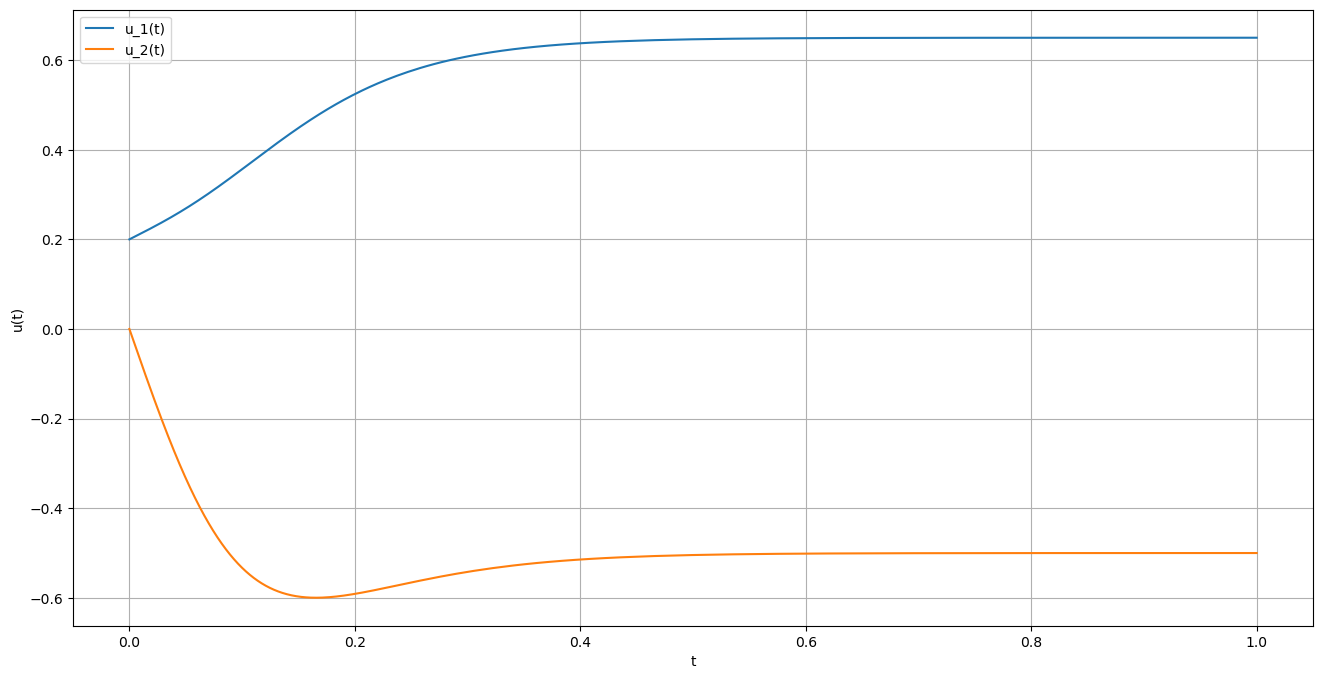

In [58]:
plt.figure(figsize=(16, 8))
plt.plot(nodes, solution[:, 0], label='u_1(t)')
plt.plot(nodes, solution[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()